Open the dataset `house_prices.csv` with the following command:

In [1]:
import os

os.makedirs("../../datasets", exist_ok=True)

In [2]:
%%bash

wget -qO "../../datasets/house_prices.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/house_prices.csv"

In [3]:
import pandas as pd
ames_housing = pd.read_csv("../../datasets/house_prices.csv", na_values="?")
target_name = "SalePrice"
data = ames_housing.drop(columns=target_name)
target = ames_housing[target_name]
ames_housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


`ames_housing` is a pandas dataframe. The column "SalePrice" contains the target variable. Note that we instructed pandas to treat the character "?" as a marker for cells with missing values also known as "null" values.

To simplify this exercise, we will only used the numerical features defined below:

In [4]:
numerical_features = [
    "LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", 
    "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", 
    "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
    "ScreenPorch", "PoolArea", "MiscVal"
]

data_numerical = data[numerical_features]
data_numerical.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,65.0,8450,196.0,706,0,150,856,856,854,0,...,0,2,548,0,61,0,0,0,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,...,1,2,460,298,0,0,0,0,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,...,1,2,608,0,42,0,0,0,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,...,1,3,642,0,35,272,0,0,0,0
4,84.0,14260,350.0,655,0,490,1145,1145,1053,0,...,1,3,836,192,84,0,0,0,0,0


Start by fitting a linear regression (`sklearn.linear_model.LinearRegression`). Use a 10-fold cross-validation and pass the argument `return_estimator=True` in `sklearn.model_selection.cross_validate` to access all fitted estimators fitted on each fold. As we saw in the previous notebooks, you will have to use a `sklearn.preprocessing.StandardScaler` to scale the data before passing it to the regressor. Also, some missing data are present in the different columns. You can use a `sklearn.impute.SimpleImputer` with the default parameters to impute missing data. Thus, you can create a model that will **pipeline the scaler, followed by the imputer, followed by the linear regression**. 

The following code creates a predictive pipeline using a linear regression as a predictor. It is evaluate via cross-validation evaluation. The coefficients can be found by inspecting the last step of each fitted pipeline stored in the key `"estimator"` from the dictionary returned by `cross_validate`. 

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate

model = make_pipeline(StandardScaler(), SimpleImputer(), LinearRegression())
cv_results = cross_validate(model, data_numerical, target, cv=10, 
    return_estimator=True)
coefs = [est[-1].coef_ for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1005.844641,493.149659,6157.777559,-3.820401e+17,-1.306599e+17,-3.650271e+17,-1.386887e+18,-1.326436e+18,-1.497799e+18,-1.707599e+17,...,2126.251705,11628.961004,-3278.454592,3285.653481,1295.911132,-3391.824436,-75.399670,790.984194,-2273.070985,-1049.229387
max,3118.334085,2600.580022,7841.778092,1.447182e+18,5.009114e+17,1.385012e+18,3.671825e+17,1.383383e+17,1.549400e+17,1.464494e+16,...,3742.495077,22652.887617,4594.573279,5790.840525,3026.579436,-1916.703879,1697.203405,2512.023819,71.752187,693.987608


Here, we use `coefs.describe()` to compute the minimum and maximum but note that this is not the only solution.

We see that the problem is ill-conditioned because the coefficients of the linear regression on each fold can be very large. This is due to some numerical errors and we should not use this model in practice.

For visually inspecting the coefficients, you could use a boxplot:

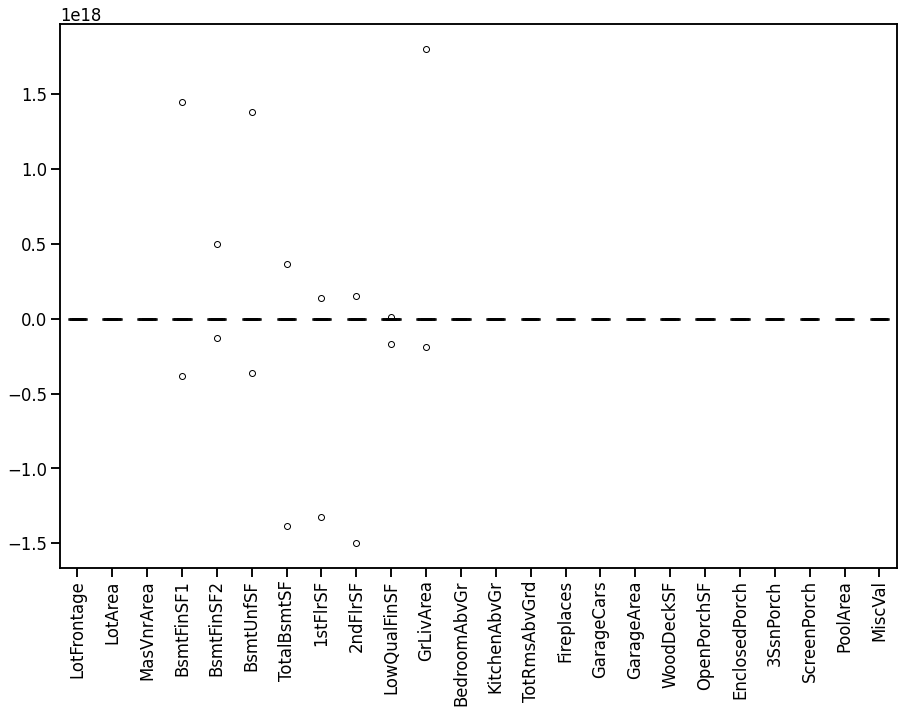

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
# Define the style of the box style
boxplot_property = {
    "vert": True,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "rot": 90,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9)
}

_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

This plot will have gave us the information that some coefficients are really large (dot on the plot).

We can do repeat the same experiment using a ridge regressor. The coefficients can be inspected from the same manner.

In [7]:
from sklearn.linear_model import Ridge

model = make_pipeline(StandardScaler(), SimpleImputer(), Ridge())
cv_results = cross_validate(model, data_numerical, target, cv=10, 
    return_estimator=True)
coefs = [est[-1].coef_ for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=numerical_features)
coefs.describe().loc[["min", "max"]]

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
min,-1106.390251,493.241149,6160.174281,7862.675825,-658.138989,2228.279835,10672.328896,7710.158127,11239.294498,-2770.486291,...,2145.289789,11610.608799,-3181.355643,3289.713416,1494.094884,-3392.058947,32.71609,741.077136,-2417.383218,-1050.605437
max,3114.054017,2600.372186,7844.293345,11098.537210,358.864078,4174.361863,15692.315254,11243.761722,13643.834636,-1279.923974,...,3758.108015,22561.856453,4623.099297,5792.154742,3030.373856,-2103.032226,1697.55411,2172.625290,70.601154,608.205089


And we can also make a plot of the variability of the coefficients with a boxplot:

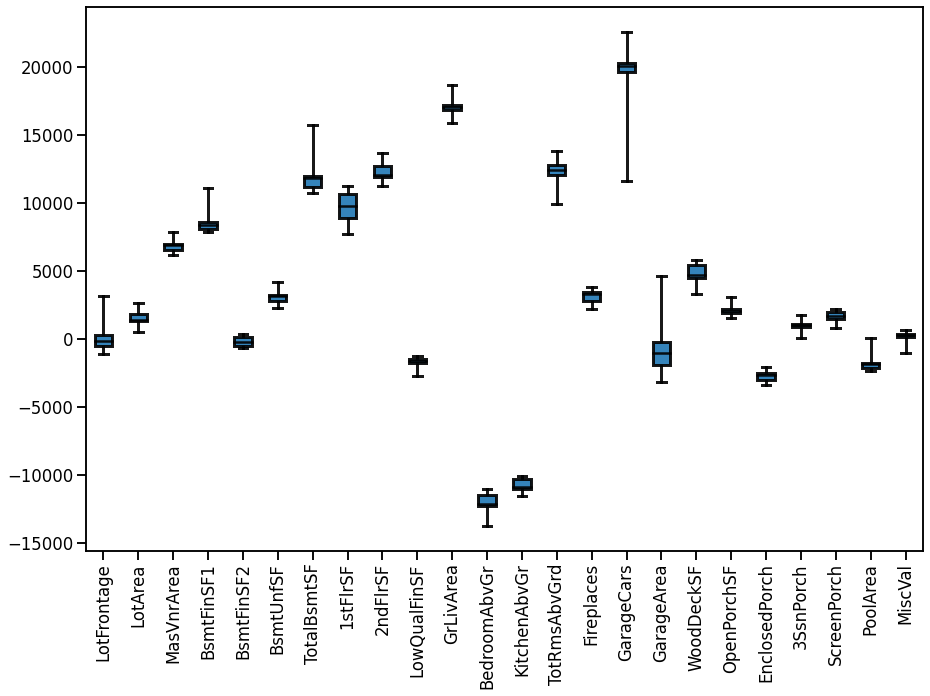

In [8]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.plot.box(**boxplot_property, ax=ax)

The regularization will shrink the coefficients towards zero. It avoids the numerical errors. In this case, the extremum is around 20,000.

We can make a box-plot of the coefficients across all folds to get a good insight for the two most important features used by the ridge regressor: `GarageCars` and `GrLivArea`.

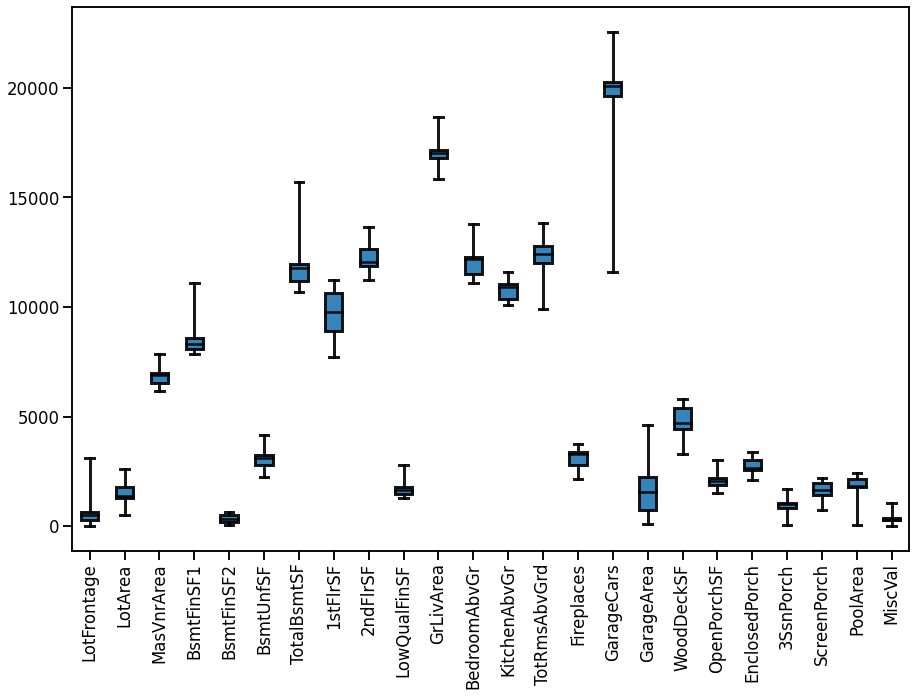

In [9]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

Indeed, we should look at the variability of the `"GarageCars"` coefficient during the experiment. In the previous plot, we could see that the coefficients related to this feature were varying from one fold to another. We can check the standard deviation of the coefficients and check the evolution.

In [10]:
coefs.describe()["GarageCars"]

count       10.000000
mean     19417.890436
std       2895.195881
min      11610.608799
25%      19618.737124
50%      20080.291274
75%      20290.014228
max      22561.856453
Name: GarageCars, dtype: float64

Let's drop the column `"GarageArea"`

In [11]:
column_to_drop = "GarageArea"
data_numerical = data_numerical.drop(columns=column_to_drop, axis=1)

cv_results = cross_validate(model, data_numerical, target, 
    cv=10, return_estimator=True)
coefs = [est[-1].coef_ for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
coefs.describe()["GarageCars"]

count       10.000000
mean     18837.583875
std       1305.925168
min      15402.011069
25%      18650.876471
50%      19223.880717
75%      19480.026815
max      19964.350894
Name: GarageCars, dtype: float64

Looking at the standard deviation, we see that it decreases by a lot. We can confirm it by plotting the coefficients variability:

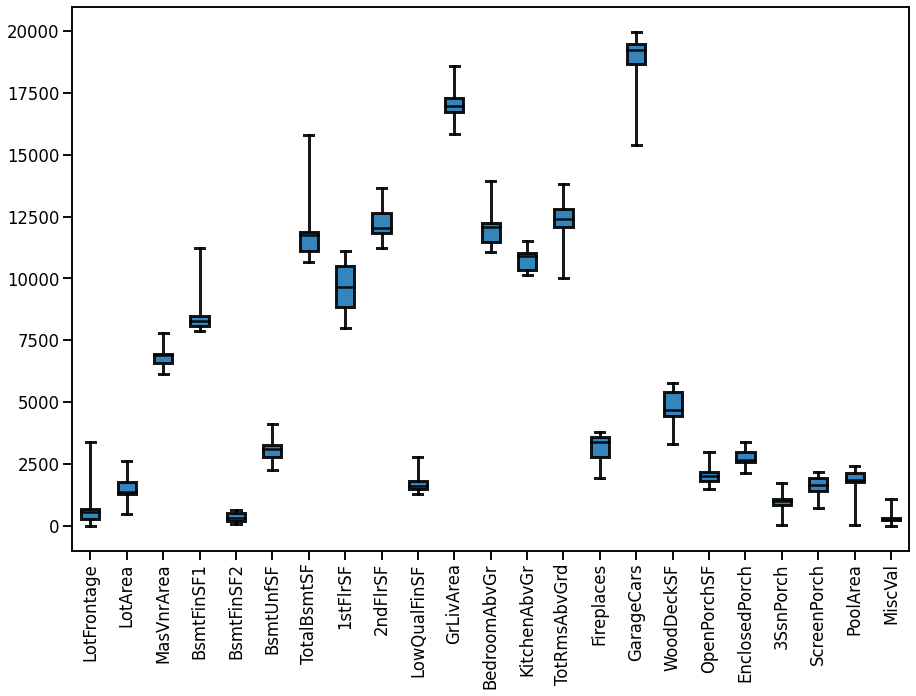

In [12]:
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

We see that the coefficients for this feature is less than in the previous case. The reason for observing the previous impact on the most important weight is both features are correlated and are carrying similar information. 

Now, we will search for the regularization strength that will maximize the statistical performance of our predictive model. Fit a `sklearn.linear_model.RidgeCV` instead of a `Ridge` regressor pass `alphas=np.logspace(-1, 3, num=30)` to explore the effect of changing the regularization strength.

We only need to repeat the previous experiment by changing the final regressor.

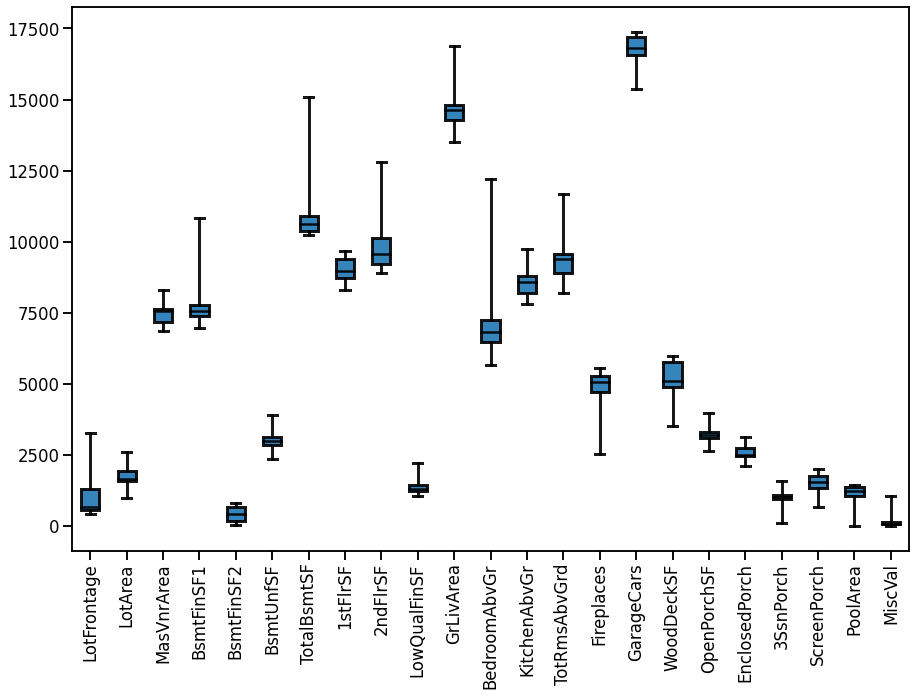

In [13]:
from sklearn.linear_model import RidgeCV
import numpy as np

alphas = np.logspace(-1, 3, num=30)
model = make_pipeline(StandardScaler(), SimpleImputer(), 
    RidgeCV(alphas=alphas))
cv_results = cross_validate(model, data_numerical, target, cv=10, 
    return_estimator=True)
coefs = [est[-1].coef_ for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=data_numerical.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

On the plot, we see that the ranks and the magnitude of the features did not change a lot. The magnitude decreased slightly; it could mean that our model chose a stronger regularization parameter than the default value in `Ridge`.

To find the parameter `alpha_` (the regularization strength) for the different ridge regressors obtained on each fold, we need to check the value of `alpha_` for the different folds.

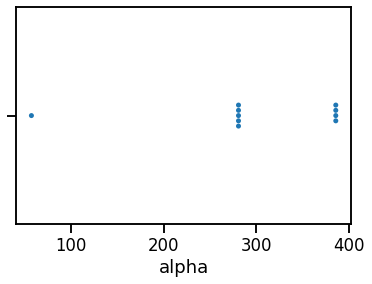

In [14]:
alpha = [est[-1].alpha_ for est in cv_results['estimator']]
alpha = pd.Series(alpha, name='alpha')
ax = sns.swarmplot(x=alpha)

In this case, we see that most `alpha_` are larger than 100 and more precisely they are contained in the range 250-400.

Now, we will tackle a classification problem instead of regression problem. Load the Adult Census dataset with the following snippet of code and we will work only with **numerical features**.

In [15]:
%%bash

wget -qO "../../datasets/adult-census.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/adult-census.csv"

In [16]:
adult_census = pd.read_csv("../../datasets/adult-census.csv")
target = adult_census['class']
data = adult_census.select_dtypes(['integer', 'floating'])
data = data.drop(columns=['education-num'])
data.head()

,age,capital-gain,capital-loss,hours-per-week
0,25,0,0,40
1,38,0,0,50
2,28,0,0,40
3,44,7688,0,40
4,18,0,0,30


By inspecting the content of the dataframe, we can see that all features selected are numerical. So the number of columns in the dataframe is also the number of numerical features.

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   capital-gain    48842 non-null  int64
 2   capital-loss    48842 non-null  int64
 3   hours-per-week  48842 non-null  int64
dtypes: int64(4)
memory usage: 1.5 MB


Using `data.info()`, the column `Non-Null Count` indicates us that no missing values are present in our dataset.

Fit a `sklearn.linear_model.LogisticRegression` classifier using a 10-fold cross-validation to assess the performance. Since we are dealing with a linear model, do not forget to scale the data with a `StandardScaler` before training the model.

We can check the average performance of the logistic regression classifier with the following code.

In [18]:
from sklearn.linear_model import LogisticRegression

model = make_pipeline(StandardScaler(), LogisticRegression())
cv_results = cross_validate(model, data, target, cv=10, 
    return_estimator=True)
scores = cv_results['test_score']
print(f"The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.800 +/- 0.004


To get the accuracy of the dummy classifier, one would need the following snippet:

In [19]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_val_score

dummy = DummyClassifier(strategy='most_frequent')
scores = cross_val_score(dummy, data, target, cv=10)
print(f"The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.761 +/- 0.000


We see that our model improve from ~76% to ~80%

To find the most important feature seen by the logistic regression, we can plot via a boxplot the variability of the coefficients.

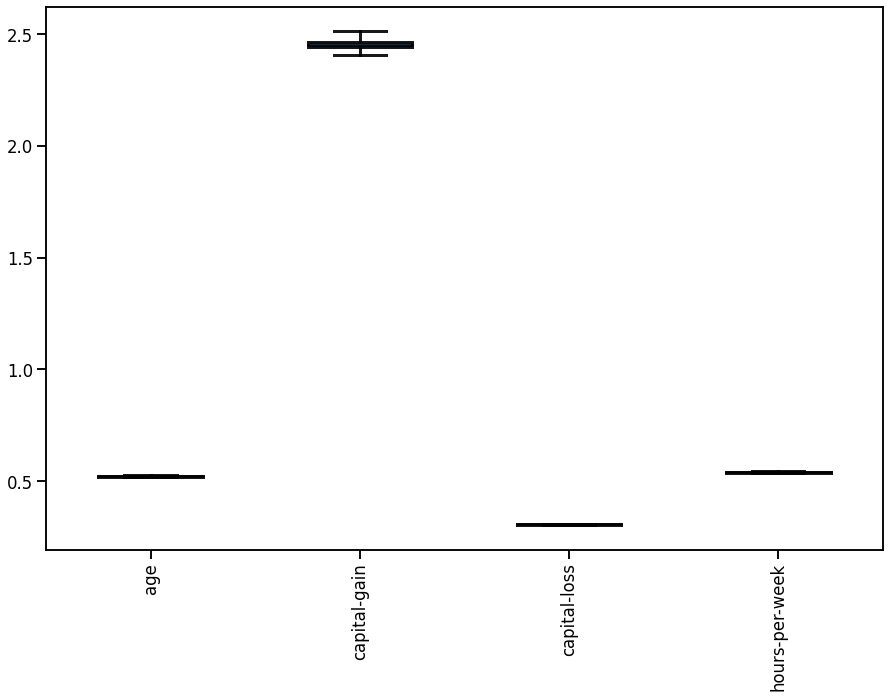

In [20]:
coefs = [est[-1].coef_[0] for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=data.columns)
_, ax = plt.subplots(figsize=(15, 10))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

Now, we will work with **both numerical and categorical features**. You can load Adult Census with the following snippet:

In [21]:
adult_census = pd.read_csv("../../datasets/adult-census.csv")
target = adult_census['class']
data = adult_census.drop(columns=['class', 'education-num'])
data.head()

,age,workclass,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,?,Some-college,Never-married,?,Own-child,White,Female,0,0,30,United-States


Using `data.info()` and looking the column "Non-Null Count" lead us to think that there is not missing data.

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   race            48842 non-null  object
 7   sex             48842 non-null  object
 8   capital-gain    48842 non-null  int64 
 9   capital-loss    48842 non-null  int64 
 10  hours-per-week  48842 non-null  int64 
 11  native-country  48842 non-null  object
dtypes: int64(4), object(8)
memory usage: 4.5+ MB


Create a predictive model where the categorical data should be one-hot encoded, the numerical data should be scaled, and the predictor used should be a logistic regression classifier.

In [23]:
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer

numerical_columns = selector(dtype_exclude=object)(data)
categorical_columns = selector(dtype_include=object)(data)

preprocessor = make_column_transformer(
    (OneHotEncoder(handle_unknown='ignore'), categorical_columns),
    (StandardScaler(), numerical_columns)
)

model = make_pipeline(preprocessor, LogisticRegression(max_iter=5000))
cv_results = cross_validate(model, data, target, cv=10, 
    return_estimator=True, n_jobs=2)
scores = cv_results['test_score']
print(f"The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} +/- {scores.std():.3f}")

The mean cross-validation accuracy is: 0.852 +/- 0.003


The statistical performance increases from ~80% to ~85%.

Use the following snippet to get the feature names after the preprocessing performed. There is as many feature names as coefficients in the last step of predictive pipeline.

We can check visually which the two most important features used by the logistic regressor.

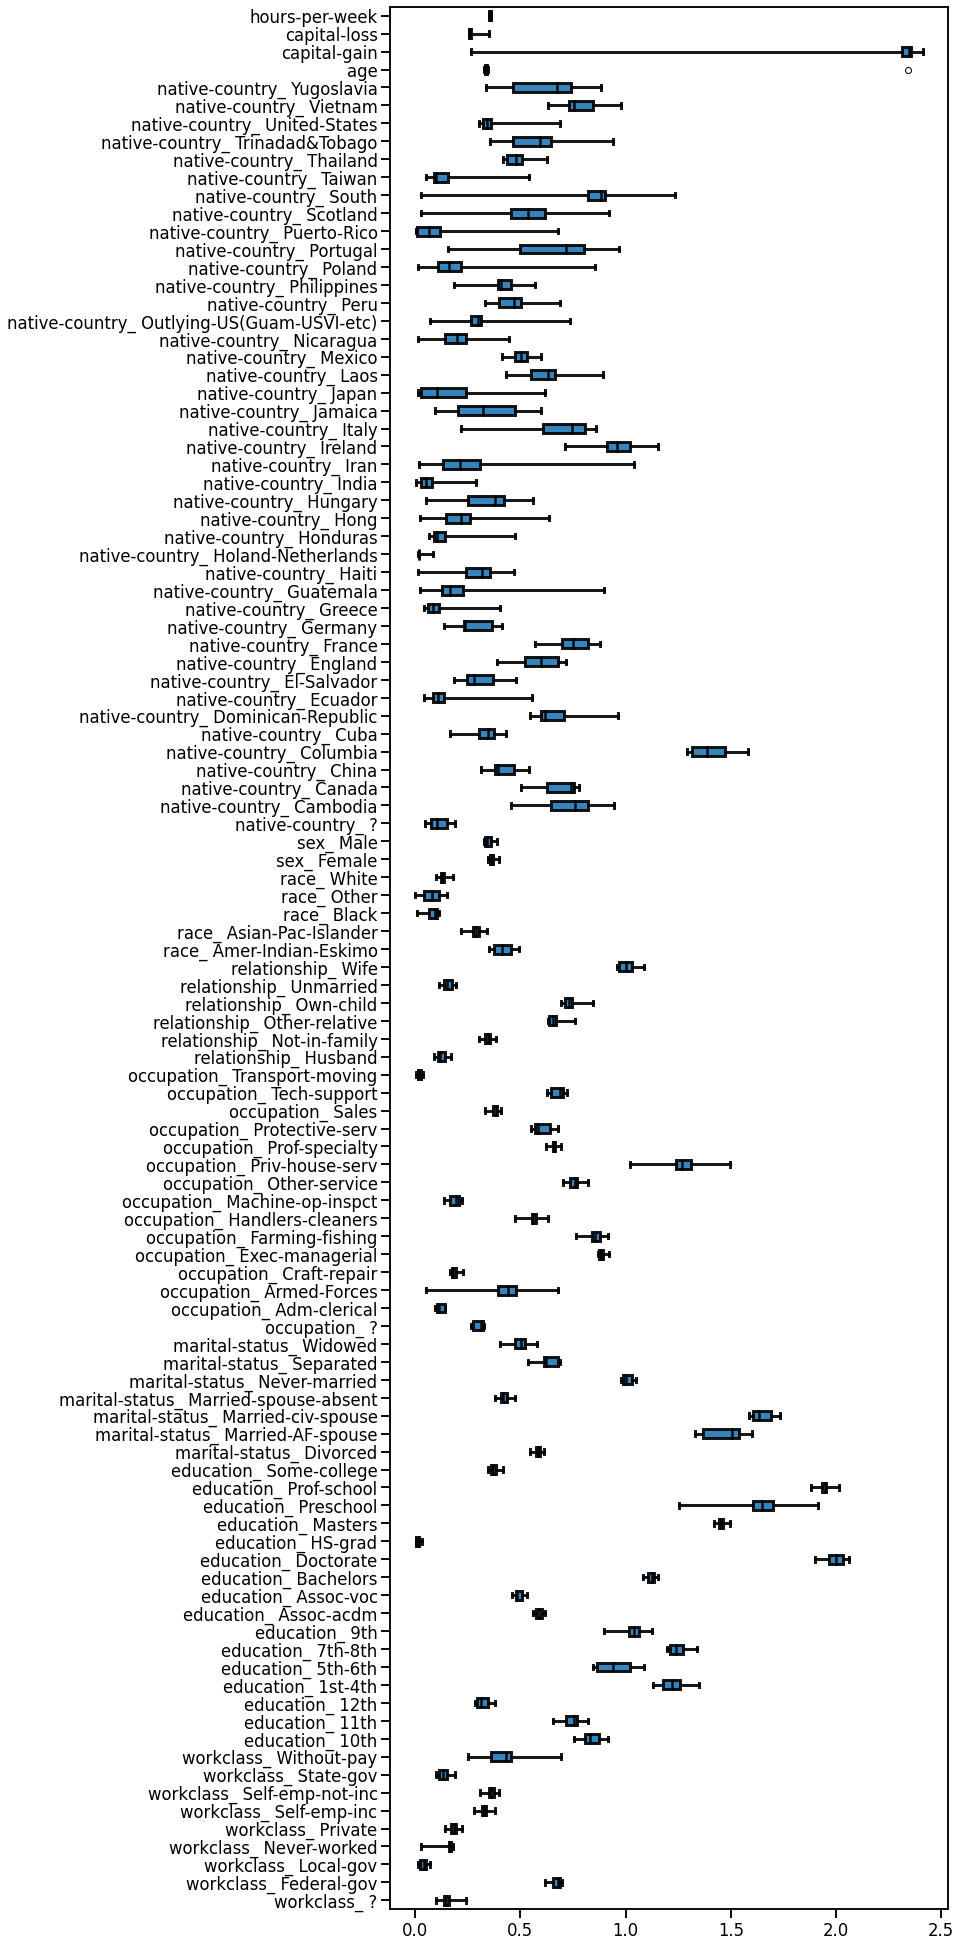

In [24]:
preprocessor.fit(data)
feature_names = (preprocessor.named_transformers_["onehotencoder"]
    .get_feature_names(categorical_columns)).tolist()
feature_names += numerical_columns

coefs = [est[-1].coef_[0] for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=feature_names)

# Define the style of the box style
boxplot_property = {
    "vert": False,
    "whis": 100,
    "patch_artist": True,
    "widths": 0.5,
    "boxprops": dict(linewidth=3, color="black", alpha=0.9),
    "medianprops": dict(linewidth=2.5, color="black", alpha=0.9),
    "whiskerprops": dict(linewidth=3, color="black", alpha=0.9),
    "capprops": dict(linewidth=3, color="black", alpha=0.9)
}

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)

The following snippet allows to check the variability of the coefficients with a logistic regression with the parameter `C=0.01`.

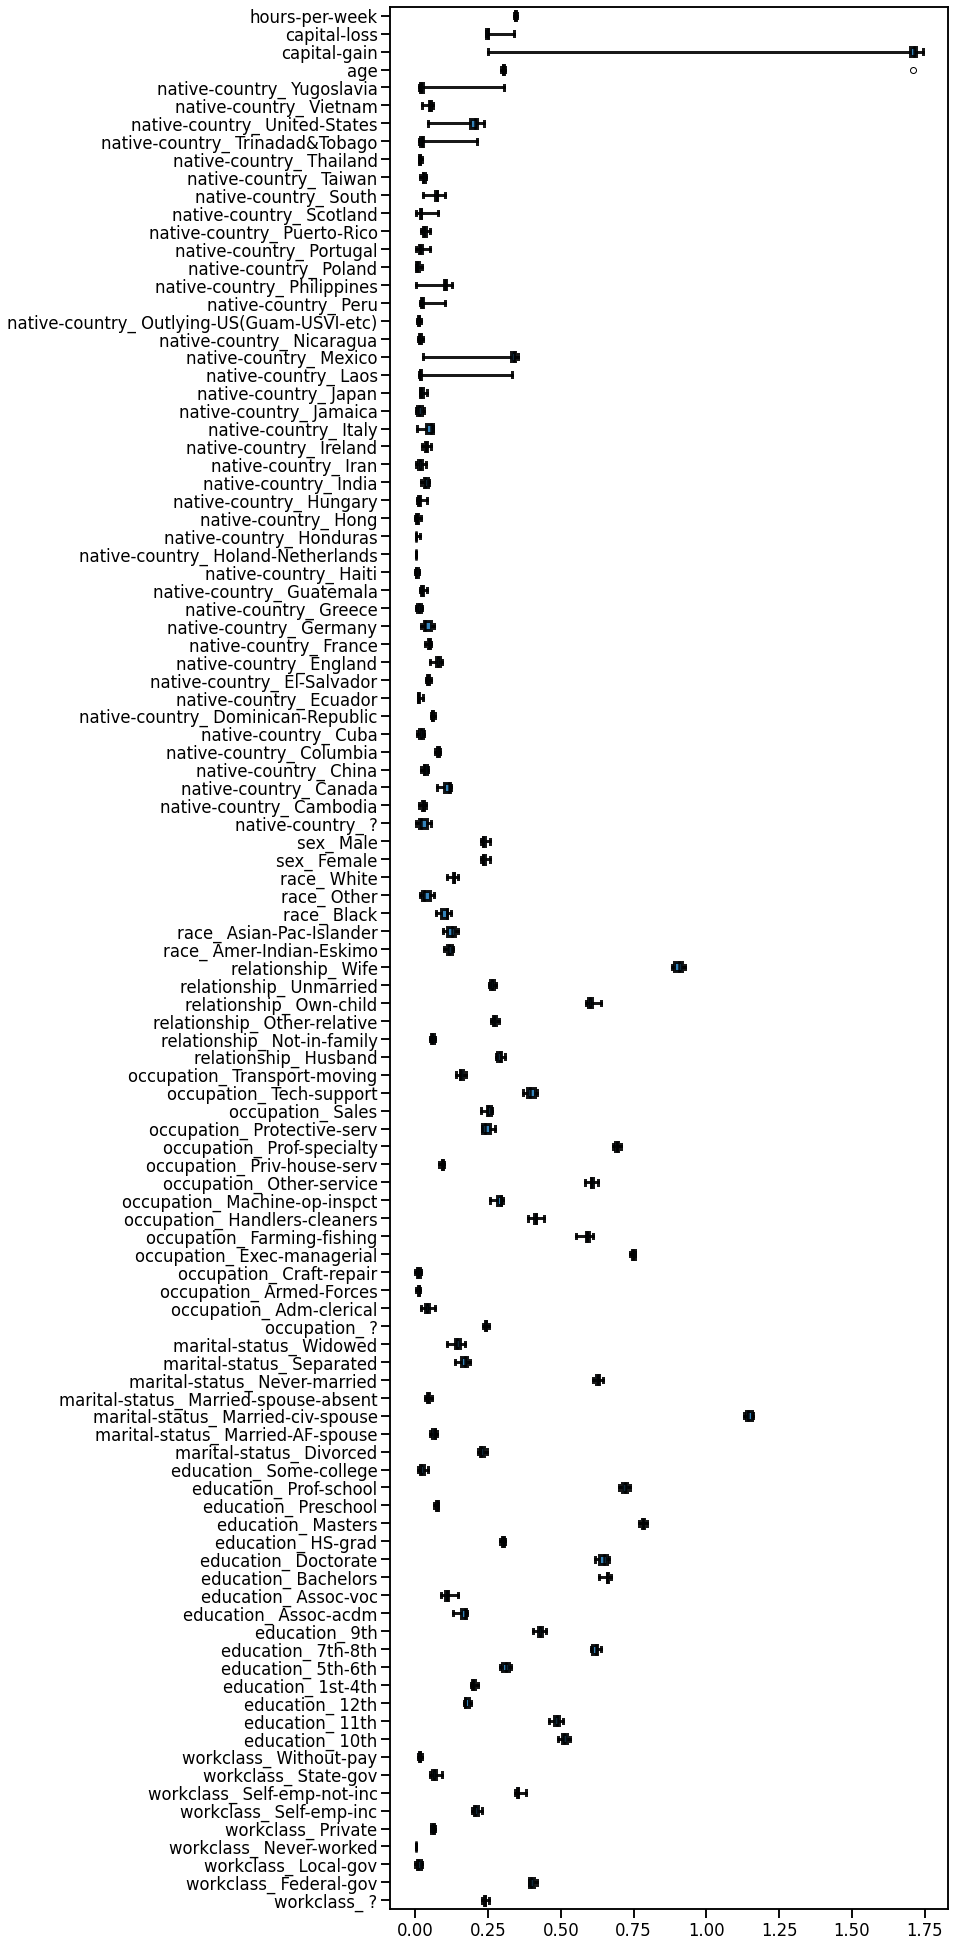

In [25]:
model.set_params(logisticregression__C=0.01)
cv_results = cross_validate(model, data, target, cv=10, 
    return_estimator=True, n_jobs=2)

coefs = [est[-1].coef_[0] for est in cv_results['estimator']]
coefs = pd.DataFrame(coefs, columns=feature_names)

_, ax = plt.subplots(figsize=(10, 35))
_ = coefs.abs().plot.box(**boxplot_property, ax=ax)